# Assignment 3 - Supervised Learning

## *Yiran Chen (Becky)*
Netid: yc390

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: 

    (1) identifying a hypothesis function set of models, 
    
    (2) determining a loss/cost/error/objective function to minimize, 
    
    (3) minimizing that function through gradient descent
    
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. How to work with imagery data and the basics of computer vision approaches to machine learning
6. Develop and understanding of Bayes rule and the optimal minimum misclassification error classifier (Bayes' Rule)

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

In [47]:
# All the import packages needed for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import time
import collections
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from scipy.stats import expon
from mlxtend.data import loadlocal_mnist


## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)** The likelihood function for all the $N$ samples in the training dataset:

$P(y|X)=\prod_{i=1}^{N}P(y_{i}|x_{i}) \\
= \prod_{i=1}^{N} (p)^{y_{i}} (1-p)^{1-y_{i}}$

where $p = \sigma(w^{T}x_{i})= \frac{e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}$


**(b)** Cost function of the model parameters:

$C(\mathbf{w}) 
= -ln(\prod_{i=1}^{N} (p)^{y_{i}} (1-p)^{1-y_{i}}) \\
= -\sum_{i=1}^{N} ln((\frac{e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}})^{y_{i}} (\frac{1}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}})^{1-y_{i}})) \\
= -(\sum_{i=1}^{N} y_{i} ln(\frac{e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}})+(1-y_{i})ln(\frac{1}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}})) \\
= \sum_{i=1}^{N} (ln(1+e^{\mathbf{w}^{\intercal} \mathbf{x}_i}) - y_{i}{\mathbf{w}^{\intercal} \mathbf{x}_i})$

**(c)**

$\dfrac{\partial C}{\partial w_0} = \sum_{i=1}^{N} x_{i,0} p - y_{i} x_{i,0} 
=  \sum_{i=1}^{N} (p - y_{i})\\
\dfrac{\partial C}{\partial w_1} = \sum_{i=1}^{N} (x_{i,1} p - y_{i} x_{i,1}) \\
\dfrac{\partial C}{\partial w_2} = \sum_{i=1}^{N} (x_{i,2} p - y_{i} x_{i,2})$ 


$\nabla_{\mathbf{w}}C(\mathbf{w}) 
= \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right] \\
= [\sum_{i=1}^{N} (p - y_{i}) , 
\sum_{i=1}^{N} (x_{i,1} p - y_{i} x_{i,1}), 
\sum_{i=1}^{N} (x_{i,2} p - y_{i} x_{i,2})]$

where $p = \sigma(w^{T}x_{i})= \frac{e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}$

**(d)** The gradient descent update equation with $\eta$ as the learning rate:

$[w_{j+1,0},w_{j+1,1},w_{j+1,2}] \\
=[w_{j,0},w_{j,1},w_{j,2}] - 
\eta[\sum_{i=1}^{N} (p - y_{i}) , 
\sum_{i=1}^{N} (x_{i,1} p - y_{i} x_{i,1}), 
\sum_{i=1}^{N} (x_{i,2} p - y_{i} x_{i,2})]$

where $p = \sigma(w^{T}x_{i})= \frac{e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}$


**(e)** It appears that there is significant overlapping area between two classes and the data is not clearly separable. Therefore, it might not be a good idea to directly apply logistic regression on these data. Some variable transformations might be needed.

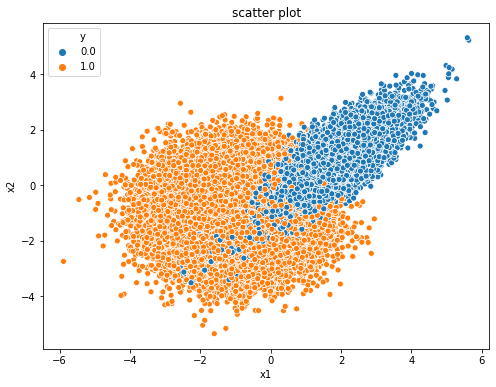

In [559]:
# (e) Prepare and plot the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/yiran/Desktop/IDS705ML/ids705_yiran/assignments/data/A3_Q1_data.csv')
df.y = df.y.astype('category')

plt.figure(figsize=(8,6))
sns.scatterplot('x1','x2',hue='y',data=df)
plt.title('scatter plot')
plt.show()

**(f)** There is no missing values in the dataset. There is no significant difference in the mean, minimum, maximum, or standard deviation values between the two classes of data. Therefore, the data does not need any preprocessing due to missing values or scale differences.

In [550]:
# Missing values
print('Checking for missing values:\n', df.isnull().any(), '\n')

# Scale difference - Check values between two classes
print('Checking for scale difference:\ny=0:\n',df[df.y==0].describe(),'\n')
print('y=1:\n',df[df.y==1].describe())

Checking for missing values:
 x1    False
x2    False
y     False
dtype: bool 

Checking for scale difference:
y=0:
                  x1            x2
count  50000.000000  50000.000000
mean       1.100109      0.203307
std        1.003636      1.004628
min       -2.822922     -3.760668
25%        0.420425     -0.475846
50%        1.101855      0.203121
75%        1.779991      0.879117
max        5.634476      5.317718 

y=1:
                  x1            x2
count  50000.000000  50000.000000
mean      -1.003052     -0.997519
std        1.000026      0.989751
min       -5.886436     -5.352265
25%       -1.678505     -1.663047
50%       -0.997074     -1.004444
75%       -0.325209     -0.327461
max        2.950153      3.135686


In [620]:
### Implement gradient descent and your logistic regression algorithm
import numpy as np
X = df[['x1','x2']].to_numpy()
y = df['y'].to_numpy()

# (g) Createa function or class to implement logistic regression
def probability(w, X, y):
    N = X.shape[0]
    X = np.concatenate((np.ones((N, 1)), X), axis=1)
    yhat = 1/(1+np.exp(-np.dot(X, w.T)))
    return yhat
    #return (yhat**y) * ((1 - yhat)**(1 - y))

In [621]:
# (h) Create a function that computes the cost function C(w) for a given dataset and corresponding class labels
def cost(w, X, y):
    N = X.shape[0]
    proba = probability(w, X, y)
    output =(np.dot(-y,np.log(proba)) - np.dot((1-y).T,np.log(1-proba)))/N
    return output

In [622]:
# (i) Create a function or class to run gradient descent on your training data ("batch" gradient descent)
def gradient(w, X, y):
    N=X.shape[0]
    proba = probability(w,X,y)
    X = np.concatenate((np.ones((N, 1)), X), axis=1)
    return np.dot(X.T, proba-y)/N

In [623]:
# (j) Design the approach so that can produce updated parameter estimates at each step.

def gradient_descent(X_train, y_train, X_test, y_test, rate):
    # intialize variables
    cost_train = []
    cost_test = []
    np.random.seed(123)
    w = np.random.random_sample(3)
    cost_train.append(cost(w, X_train, y_train))
    cost_test.append(cost(w, X_test, y_test))
    step_size = 1

    # perform gradient descent
    while step_size >= 1.0e-06: # stopping criteria
        w_norm_prev = np.linalg.norm(w, ord=2)
        w = w - rate * gradient(w, X_train, y_train)
        w_norm_cur = np.linalg.norm(w, ord=2)
        step_size = abs(w_norm_prev - w_norm_cur)
        cost_train.append(cost(w, X_train, y_train))
        cost_test.append(cost(w, X_test, y_test))
        #print(step_size)
        #print(cost_train)
    return w, cost_train, cost_test

**(k)** The plot shows logarithmic decrease of the resulting costs as the number of iteration increases. It can be seen that the training and test data have similar resulting costs and overlapping curves for different choices of learning rates.

By having a large learning rate, the parameters are adjusted at larger steps within each iteration, and the cost function reaches its minimum point much faster with signicantly less iterations needed. The downside of using a large learning rate is the possibility of missing minimum cost due to the large steps taken. Here in this case there is no such worry that large learning rate would skip a local minimum without setting learning rate to significantly large values. 

On the other hand, using a small learning rate, the parameters are taking smaller steps moving down the gradient with more iterations need. Though it takes longer time to run, the resolution of the resulting costs are much granular and the line is smoother. This way we are more enabled to pinpoint at which iteration the cost function reaches its minimum value.

Here the learning rate is chosen to be 0.6. At this value, the cost function can reach its minimum at around 30 iterations with satisfactory granularity. We are able to achieve a balance between efficiency and accuracy.


In [624]:
# (k) 
# Divide data into training and test set

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
X_train = train[['x1','x2']].to_numpy()
y_train = train['y'].to_numpy()
X_test = test[['x1','x2']].to_numpy()
y_test = test['y'].to_numpy()

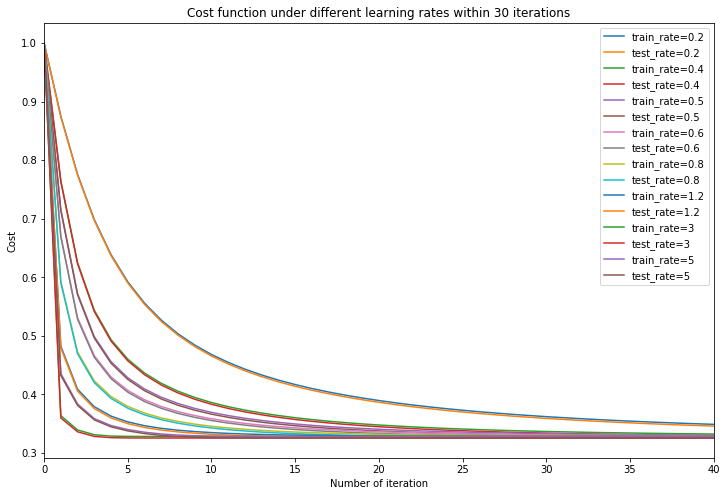

In [625]:
# Plot the resulting cost as a function of each iteration
import seaborn as sns
import matplotlib.pyplot as plt

rate = [0.2,0.4,0.5,0.6,0.8,1.2,3,5]
plt.figure(figsize = (12,8))
for i in rate:
    w, cost_train, cost_test = gradient_descent(X_train, y_train, X_test, y_test, i)
    plt.plot(cost_train, label=f'train_rate={i}')
    plt.plot(cost_test, label=f'test_rate={i}')
    
plt.xlabel('Number of iteration')
plt.ylabel('Cost')
plt.title('Cost function under different learning rates within 30 iterations')
plt.legend()
plt.xlim(0,40)
plt.show()

In [626]:
### Test model performance through cross validation
from sklearn.model_selection import StratifiedKFold

#(l)
# Establish k folds
kf = StratifiedKFold(n_splits=5, shuffle=True)
pred_prob = np.empty(y_train.shape, dtype='object')

for train_index, val_index in kf.split(X_train, y_train):
    # Extract the training and validation data for this fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    
    # Use training data to get optimal paramter w
    w = gradient_descent(X_train_cv, y_train_cv, X_val_cv, y_val_cv, rate=0.6)[0]
    
    # Use the optimal w to calculate probability of the validation data for this fold
    X_val_cv = np.concatenate((np.ones((X_val_cv.shape[0], 1)), X_val_cv), axis=1)
    y_val_pred = 1/(1+np.exp(-np.dot(X_val_cv, w.T)))

    # Save the predictions for this fold
    pred_prob[val_index] = y_val_pred

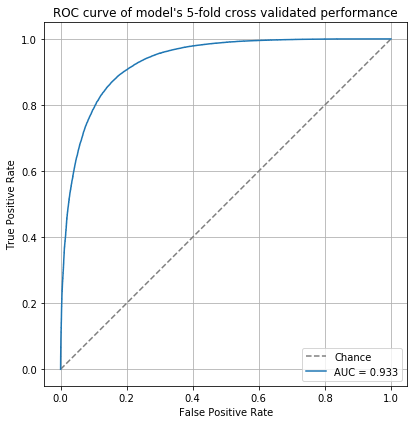

In [627]:
from sklearn import metrics

fpr, tpr, thres = metrics.roc_curve(y_train, pred_prob, pos_label=1)
auc = metrics.roc_auc_score(y_train, pred_prob)
legend_string = 'AUC = {:0.3f}'.format(auc)

plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.title('ROC curve of model\'s 5-fold cross validated performance')
plt.tight_layout()

**(m)** Why do we use cross validation?

In terms of model assessment, performing cross validation helps to determine how well the model can be expected to perform on new data, giving a measure of the model's generalization ability.

In terms of model selection, cross validation gives an idea whether the performed model is a good fit to the given data. Using different metrics obtained from cross validation, we are able to select the most suitable model to continue with.

**(n)** Comment on the decision boundary. Could it be improved?

The decision boundary is not performing very good as the data is difficult to seperate. As can be seen from the graph, the boundary is curved along the intersection edge of the concentrated center circle and the slanted oval. Therefore polynomial or higher order transformations might be able to improve the decision boundary.

In [12]:
# (n) Make two plots - one of your training data, and one for your test data
# with the data scatter-plot and the decision boundary for your classifier
# Define the grid as X_test for prediction

In [469]:
nvalues = 500
x1values = np.linspace(X_train[:,0].min()-1,X_train[:,0].max()+1,nvalues)
x2values = np.linspace(X_train[:,1].min()-1,X_train[:,1].max()+1,nvalues)
XX1, XX2 = np.meshgrid(x1values, x2values, indexing='ij')
grid = np.array([XX1.ravel(), XX2.ravel()]).T

In [57]:
# Use training data to get optimal paramter w
w = gradient_descent(X_train, y_train, X_test, y_test, rate=0.6)[0]

# Use the optimal w to calculate probability of the test data (grid)
grid = np.concatenate((np.ones((grid.shape[0], 1)), grid), axis=1)
grid_pred = 1/(1+np.exp(-np.dot(grid, w.T)))

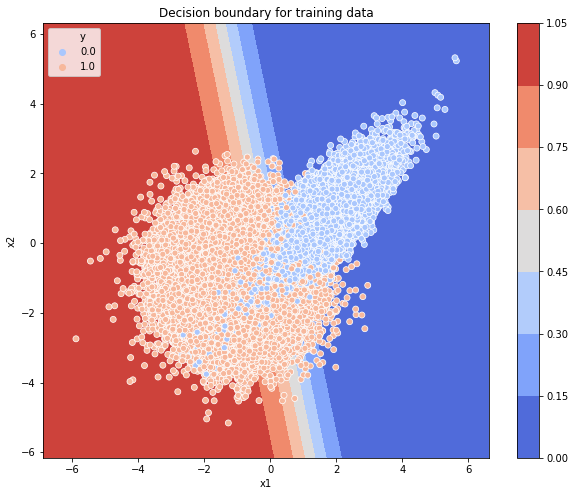

In [16]:
# for training data
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,8))
plt.contourf(XX1, XX2, grid_pred.reshape(XX1.shape), cmap='coolwarm')
sns.scatterplot('x1','x2',hue='y',data=train, palette='coolwarm')
plt.colorbar()
plt.title('Decision boundary for training data')
plt.show()

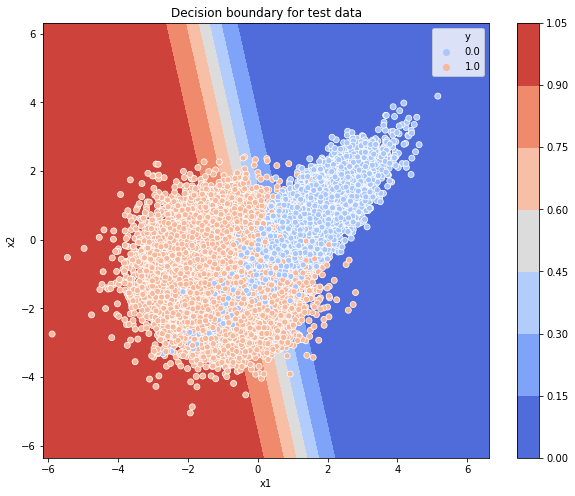

In [420]:
plt.figure(figsize=(10,8))
plt.contourf(XX1, XX2, grid_pred.reshape(XX1.shape), cmap='coolwarm')
sns.scatterplot('x1','x2',hue='y',data=test,palette='coolwarm')
plt.colorbar()
plt.title('Decision boundary for test data')
plt.show()

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

By using the optimal weights w from full training data and plotting the ROC curve comparing full test data, it can be seen that the model performs well with 0.934 AUC. This is much better than random guessing with 0.5 AUC.

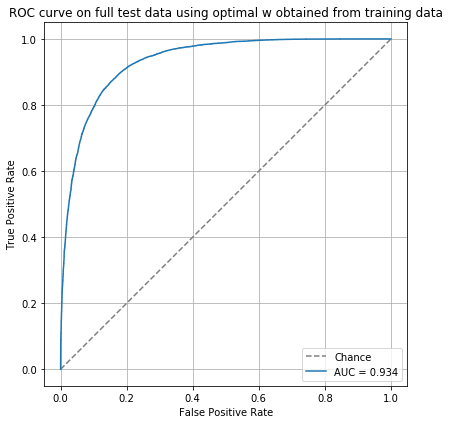

In [68]:
# Use training data to get optimal paramter w
w = gradient_descent(X_train, y_train, X_test, y_test, rate=0.6)[0]

# Use the optimal w to calculate probability of the validation data
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_test_pred = 1/(1+np.exp(-np.dot(X_test, w.T)))

fpr, tpr, thres = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_test_pred)
legend_string = 'AUC = {:0.3f}'.format(auc)

plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.title('ROC curve on full test data using optimal w obtained from training data')
plt.tight_layout()

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(e)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

In [543]:
# (a) Construct MNIST dataset by transforming labels

# load the minist dataset
import numpy as np
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(images_path='/Users/yiran/Desktop/IDS705ML/ids705_yiran/assignments/data/mnist/train-images-idx3-ubyte', 
                                   labels_path='/Users/yiran/Desktop/IDS705ML/ids705_yiran/assignments/data/mnist/train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='/Users/yiran/Desktop/IDS705ML/ids705_yiran/assignments/data/mnist/t10k-images-idx3-ubyte', 
                                 labels_path='/Users/yiran/Desktop/IDS705ML/ids705_yiran/assignments/data/mnist/t10k-labels-idx1-ubyte')

# dataset statistics
print('Training image data: {0}'.format(X_train.shape))
print('Testing image data: {0}'.format(X_test.shape))
print('28 x 28 = {0}'.format(28*28))


Training image data: (60000, 784)
Testing image data: (10000, 784)
28 x 28 = 784


In [544]:
# transform label 3 into binary
y_train_3 = np.zeros((X_train.shape[0]))
y_train_3[y_train==3]=1
y_test_3 = np.zeros((X_test.shape[0]))
y_test_3[y_test==3]=1

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

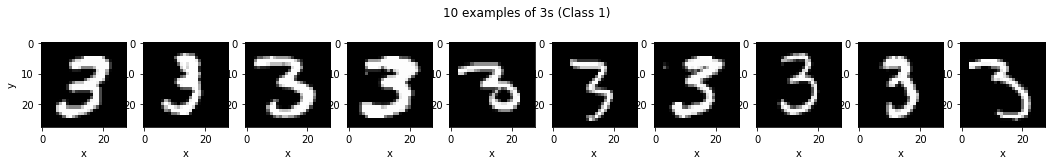

In [545]:
# (b) Plot 10 examples of each class from the training dataset
fig, axs = plt.subplots(1,10,figsize=(18,16))
# Class=1
index = 0
for ax in axs:
    image = np.reshape(X_train[y_train_3==1][index],[28,28])
    ax.imshow(image, cmap='gray')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    index+=1
fig.suptitle('10 examples of 3s (Class 1)')
fig.subplots_adjust(top=1.7)
plt.show()

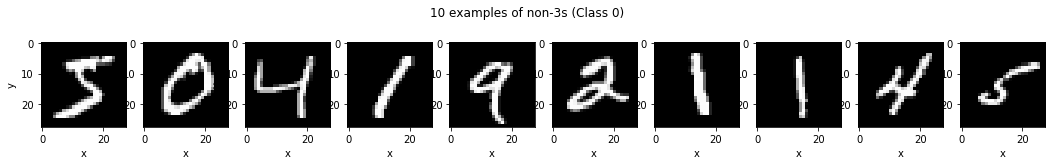

In [487]:
# Class=0
fig, axs = plt.subplots(1,10,figsize=(18,16))
index = 0
for ax in axs:
    image = np.reshape(X_train[y_train_3==0][index],[28,28])
    ax.imshow(image, cmap='gray')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    index+=1
fig.suptitle('10 examples of non-3s (Class 0)')
fig.subplots_adjust(top=1.7)
plt.show()

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(c)** In the training data, there are 53,869 examples in class 0 (non-3s), but only 6131 examples in class 1 (3s). The classes are very imbalanced. This means that there may not be sufficient data for the model to understand the patterns of the minority class to properly represent its distribution. The classifier is likely to perform better predicting class 0 (non-3s) but perform poorly on class 1 (3s).

In [488]:
# (c) 
import collections

y_train_counter = collections.Counter(y_train_3)
y_train_counter

Counter({0.0: 53869, 1.0: 6131})

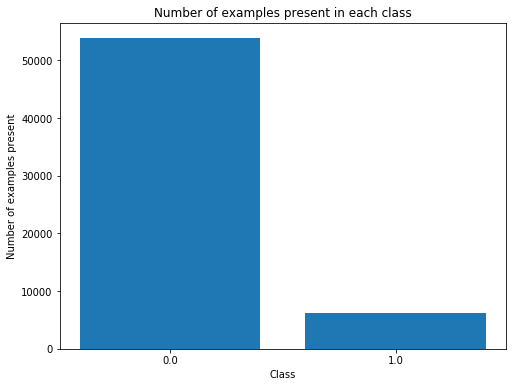

In [489]:
labels, values = zip(*y_train_counter.items())
indexes = np.arange(len(labels))
width = 1
plt.figure(figsize=(8,6))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel('Class')
plt.ylabel('Number of examples present')
plt.title('Number of examples present in each class')
plt.show()

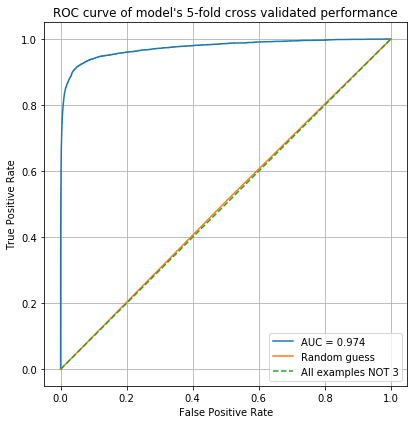

In [546]:
# (d) ROC with k fold cross validation (training data)

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Establish k folds
kf = StratifiedKFold(n_splits=5, shuffle=True)
pred_prob = np.empty(y_train_3.shape, dtype='object')

for train_index, val_index in kf.split(X_train, y_train_3):
    # Extract the training and validation data for this fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train_3[train_index], y_train_3[val_index]
    
    # Train the classifier
    clf = LogisticRegression(solver='lbfgs')
    clf.fit(X_train_cv, y_train_cv)

    # Test the classifier on the validation data for this fold
    cpred = clf.predict_proba(X_val_cv)[:,1]
    
    # Save the predictions for this fold
    pred_prob[val_index] = cpred


from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(y_train_3, pred_prob, pos_label=1)
auc = metrics.roc_auc_score(y_train_3, pred_prob)
legend_string = 'AUC = {:0.3f}'.format(auc)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=legend_string)
#plt.plot([0,1],[0,1],'--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')

fpr, tpr, thrs = metrics.roc_curve(y_train_3, np.random.randint(2,size=y_train_3.shape), pos_label=1)
plt.plot(fpr, tpr, label="Random guess")
fpr, tpr, thrs = metrics.roc_curve(y_train_3, np.zeros(y_train_3.shape), pos_label=1)
plt.plot(fpr, tpr, '--',label="All examples NOT 3")

plt.legend()
plt.title('ROC curve of model\'s 5-fold cross validated performance')
plt.tight_layout()

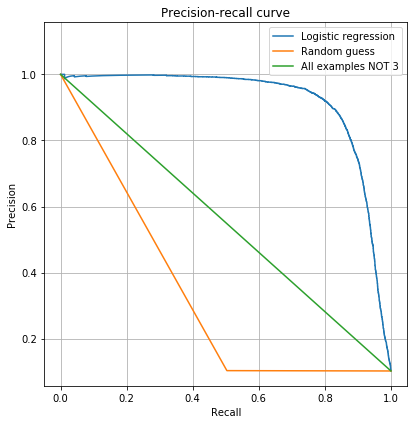

In [491]:
# Precision-recall curve
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))

precision, recall, thres = precision_recall_curve(y_train_3, pred_prob, pos_label=1)
plt.plot(recall, precision, label='Logistic regression')
precision, recall, thres = precision_recall_curve(y_train_3, np.random.randint(2,size=y_train_3.shape), pos_label=1)
plt.plot(recall, precision, label='Random guess')
#plt.plot([0,0,1],[1,0,0],'--', color='gray', label='Random guess')

precision, recall, thres = precision_recall_curve(y_train_3, np.zeros(y_train_3.shape), pos_label=1)
plt.plot(recall, precision, label="All examples NOT 3")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.title('Precision-recall curve')
plt.tight_layout()

**(d) Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.**

The logistic regression outperforms the other two with a high AUC value, and there is 98% chance that the model will be able to distinguish positive and negative class (3 and non-3s). The precision and recall values are able to achieve a good balance at certain point where both are able to achieve around 90%.

With a random guess classifier, the AUC is 0.5 and the model will be able to predict classes correctly 50% of the times. There are a slant and horizontal line at the left most and bottom of the precision-recall plot respectively. The horizontal line seperates the precision-recall space into two areas based on the distribution of positive and negative classes for given datasets. Here it is determined by $\frac{P}{P+N}=0.1$ of the given imbalanced test set.

For a classifier that classifies every instance as non-3, it can also achieve 50% AUC as the classifier can always predicts correclty at one of the binary outcomes - non-3. The proportion of correct positive predictions (precision) and the proportion of actual positives identified correctly (recall) are equal.

The ROC provides a measure of overal predictive power of a model and therefore will be overly optimistic when there is a very imbalanced dataset. On the other hand, the precision-recall curve can provide more accurate predictions as it evaluates the ratio of true positives among positive predictions and does not depend on class distribution.


In [479]:
print('Distribution of positive and negative cases in test set:\n',collections.Counter(y_test_3).items())
print(f'Ratio of positive cases is around {int(1010/(1010+8990)*100)}%')

Distribution of positive and negative cases in test set:
 dict_items([(0.0, 8990), (1.0, 1010)])
Ratio of positive cases is around 10%


In [547]:
# (e) 
# Using a logistic regression classifier (a linear classifier)
# Apply lasso regularization and retrain the model 

non0_list = []
cost_list = []
f1_list = []
auc_list = []

c_list = np.logspace(-5,5,11)

for c in c_list:
    clf_lasso = LogisticRegression(penalty='l1', C=c**(-1), solver='liblinear',max_iter=100)
    clf_lasso.fit(X_train, y_train_3)
    y_test_pred = clf_lasso.predict(X_test)
    y_test_prob = clf_lasso.predict_proba(X_test)[:,1]

    non0 = np.count_nonzero(clf_lasso.coef_)
    non0_list.append(non0)
    
    w = np.append(clf_lasso.intercept_, clf_lasso.coef_)
    cost_test = cost(w, X_test, y_test_3)
    cost_list.append(cost_test)
    
    f1 = metrics.f1_score(y_test_3, y_test_pred, pos_label=1)
    f1_list.append(f1)
    
    auc = metrics.roc_auc_score(y_test_3, y_test_prob)
    auc_list.append(auc)

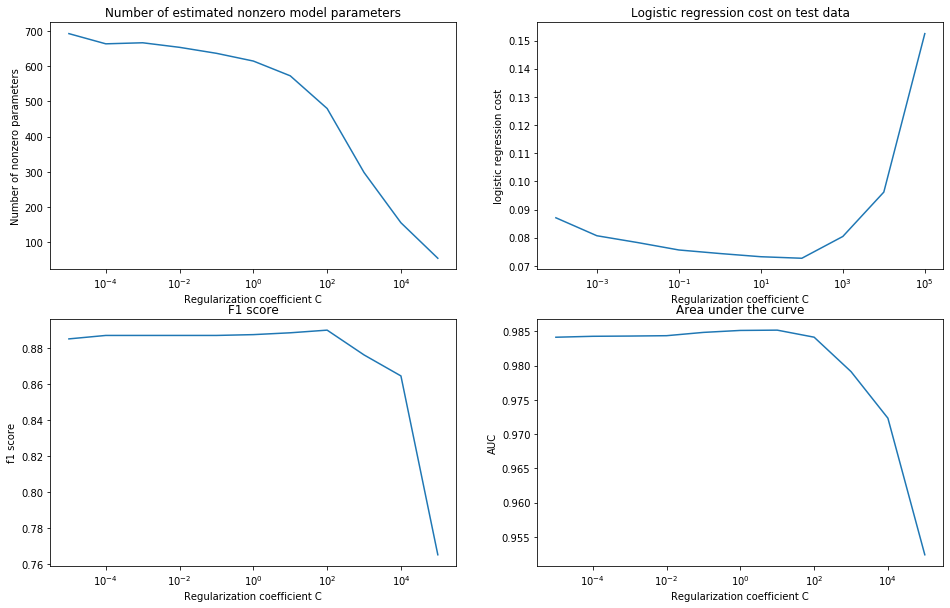

In [548]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(c_list, non0_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient C')
plt.ylabel('Number of nonzero parameters')
plt.title('Number of estimated nonzero model parameters')

plt.subplot(2,2,2)
plt.plot(c_list, cost_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient C')
plt.ylabel('logistic regression cost')
plt.title('Logistic regression cost on test data')

plt.subplot(2,2,3)
plt.plot(c_list, f1_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient C')
plt.ylabel('f1 score')
plt.title('F1 score')

plt.subplot(2,2,4)
plt.plot(c_list, auc_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient C')
plt.ylabel('AUC')
plt.title('Area under the curve')
plt.show()

**(e) Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.**

**(e)** The logistic regression classifier is applied with lasso regularization. From the above assessment plots of the retrained model, it can be seen that as the regularization coefficient ($C$) increases, the number of nonzero estimated model parameters decreases. The cost function obtained from the test set first decreases as C gets larger, but increases afterwards after passing around point ($C=10^{-2}$). The harmonic mean of precision recall (F1 socre) and the AUC both first stay at around the same value then dropped significantly as the regularization coefficient increases to a certain point. The most appropriate regularization coefficient value is determined to be $10^{-2}$ where the F1 score and AUC is the highest and the model is most robust. 

The lasso regularization helps to shrink parameters to a larger extent and sometimes even to zero. It excludes useless variables from equations and reduces the variance in the model. However, if the paramaters are useful, applying higher penalty to comparatively not-so-useful parameters and eliminating them will cause a problem. As the regularization cofficient increases up above a certain threshold (in this case 100), the model has bad performance across different measures suggesting higher bias and potential underfitting.

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

**(a) Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.***

In [459]:
# (a)
from scipy.stats import expon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

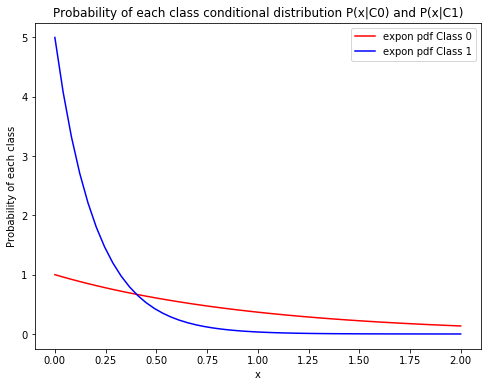

In [460]:
# Probability density function
plt.figure(figsize=(8,6))
x = np.linspace(0,2)
plt.plot(x, expon.pdf(x,scale=1),'r-', label='expon pdf Class 0')
plt.plot(x, expon.pdf(x,scale=0.2),'b-', label='expon pdf Class 1')
plt.xlabel('x')
plt.ylabel('Probability of each class')
plt.title('Probability of each class conditional distribution P(x|C0) and P(x|C1)')
plt.legend()
plt.show()

**(b) Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form:**

**If $x > x^*$, then predict Class 0, otherwise predict Class 1**

**Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.**

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, according to Baye's theorem:

$$P(C_{i}|x) = \frac{P(x|C_{i})P(C_{i})}{P(x)}$$

$$P(C_{0}|x) = \frac{P(x|C_{0})P(C_{0})}{P(x)}
=\frac{e^{-x} \times 0.5}{e^{-x} \times 0.5 + 5e^{-5x} \times 0.5}
=\frac{1}{1+5e^{-4x}}$$

$$P(C_{1}|x) = \frac{P(x|C_{1})P(C_{1})}{P(x)}
=\frac{5e^{-5x} \times 0.5}{e^{-x} \times 0.5 + 5e^{-5x} \times 0.5}
=\frac{5}{5+e^{4x}}$$

The decision rule follows that if $x > x^*$, then predict Class 0, otherwise Class 1.

$$Set P(C_{0}|x^{*}) >P(C_{1}|x^{*}) \\
\frac{1}{1+5e^{-4x^{*}}} > \frac{5}{5+e^{4x^{*}}} \\
e^{4x^{*}} + 5 > 5(1+5e^{-4x^{*}})\\
e^{4x^{*}}  > 25e^{-4x^{*}} \\
e^{8x^{*}}  > 25 \\
x^{*} > \frac{1}{8}ln(25) \approx 0.40236$$

Therefore $x^{*} = \frac{1}{8}ln(25) \approx 0.40236$ will minimize misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections).

**(c) How does your answer in (b) relate to the the plot you made in (a)? Why?**

When x is smaller than $x^*=0.40236$ there is high likelihood that x belongs to Class 1. The cumulative probability (area under the probability distribution curve) is much higher for Class 1 compared to Class 0 on the left side of $x^*$. This suggests that most points in that value region are more likely to be belong to Class 1. Similarly when x is larger than $x^*=0.40236$ there is higher likelihood that x belong to Class 0 and therefore assigned to Class 0.


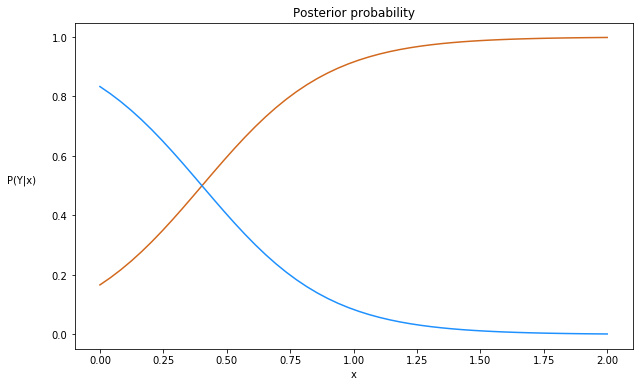

In [461]:
lambda_0 = 1
lambda_1 = 5
P_x = expon.pdf(x,scale=1/lambda_0)*0.5 + expon.pdf(x,scale=1/lambda_1)*0.5

post0 = expon.pdf(x, scale=1/lambda_0)*0.5/P_x
post1 = expon.pdf(x, scale=1/lambda_1)*0.5/P_x

plt.figure(figsize=(10,6))
plt.plot(x, post0,'chocolate',label = 'P(x|C0)')
plt.plot(x, post1,'dodgerblue',label ='P(x|C1)')
plt.xlabel('x')
plt.ylabel('P(Y|x)', rotation = 0, labelpad=30)
plt.title('Posterior probability')
plt.show()

**(d) Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?**

In [462]:
warnings.filterwarnings('ignore')
# (d) 
# Load the test data
test = pd.read_csv('/Users/yiran/Desktop/IDS705ML/ids705_yiran/assignments/data/A3_Q3_test.csv')

# Apply the decision rule to test data
test['y_pred']=0
test['y_pred'][test.x < np.log(25)/8]=1
test['correct'] = test.y==test.y_pred

# Calculate misclassification rate/error rat
error_rate = test.correct.value_counts()[0]/len(test)
print(f'With this decision rule, the misclassification rate on the test data is {error_rate:3f}.')

With this decision rule, the misclassification rate on the test data is 0.233950.


In [463]:
# (e)
# Load the training data
train = pd.read_csv('/Users/yiran/Desktop/IDS705ML/ids705_yiran/assignments/data/A3_Q3_train.csv')

x_train = train.x.to_numpy()
y_train = train.y.to_numpy()
x_test = test.x.to_numpy()
y_test = test.y.to_numpy()

In [464]:
# Train a logistic regression classifier on the data (using default parameters)
clf = LogisticRegression()
clf.fit(x_train.reshape(-1, 1), y_train)
y_pred = clf.predict(x_test.reshape(-1, 1))

# Calculate misclassification error for test dataset
error_rate = 1 - sum(y_pred==y_test)/len(y_test)
print(f'With a logistic regression classifier trained from training data, the misclassification rate on the test data is {error_rate:2f}.')


With a logistic regression classifier trained from training data, the misclassification rate on the test data is 0.234000.


**(e) Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?**

The misclassification error using trained logistic regression classifier for test dataset is 0.234. The error rate is around the same with Bayes' classifier.

**(f) What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?**

The decision rule (the cutoff for x) is obtained using the coefficients and intercept obtained from the logistic regression. When the predicted probaility of Class 1 is greater than the predicted probability of Class0, the observation is classified as Class 1. It is found out that the decision rule (cutoff for x) is around the same with that from Bayes' classifier. 

$\frac{p}{1-p}>1 \\
p > 0.5 \\
\frac{e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}} > 0.5 \\
e^{\mathbf{w}^{\intercal} \mathbf{x}_i} > 1 \\
w_0+w_1 x>0 \\
x>-\frac{w_1}{w_0}$


In [467]:
intercept = clf.intercept_
coef = clf.coef_
clf_thres =  - float(intercept/coef)
print(f'The decision rule using the logistic regression model is calculated to be {clf_thres:3f}. This is very similar to the decision rule of the Bayes classifier.')


The decision rule using the logistic regression model is calculated to be 0.403339. This is very similar to the decision rule of the Bayes classifier.


**(g)** If the prior probabilities were not $P(C_{0})=P(C_{1})=0.5$, but instead if $P(C_1)>P(C_0)$. How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

if $P(C_{1})>P(C_{0})$, the optimal decision rule will change. As Class 1 has higher prior probability, the resulting posterior probability will increase. In other words, the conditional probability assigning to Class 1 after seeing the data is higher. Therefore $x^*$ will be larger.

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**ANSWER**

## Prediction of term deposit subscription of a banking institution

### Summary

The objective of the project is to predict whether a client will subscribe a term deposit or not based on his or her profile data, information related to the last marketing compaigns, social and economic context attributes, etc. Such predictions will be able to help the banking institution estimate its marketing revenue in this area. By using classification techniques such as logistic regression, we can also provide insights on inferencial relationships. It would be interesting to know whether what attributes of direct marketing campaigns based on phone calls have higher associations with the response, which will help advice marketing strategies.

### Data source

The data is related with direct marketing campaigns of a Portuguese banking institution (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset used is `bank-additional-full.csv` with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Input variables:**
**bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
**Related with the last contact of the current campaign:**
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
**Other attributes:**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**Social and economic context attributes:**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [65]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import collections

### Data Preprocessing
**Missing values**

There are different amount of missing data records in each variable. The most unknown value count occurs in *default* which comprise 20% of the total records. However, as the main project objective is to predict whether a client will subscribe or not, and with sufficient available data up to more than 40,000 records, the missing values are reasonably discarded.

**Binary and multi-category variables**

The often-occuring "yes/no" binary response across different variables are modified to 1 and 0. For multi-category variables, dummy variables are created for each subcategory with 0 or 1 input. Specifically for *education* which has sequential meanings attached, it is converted into a series of increasing numbers representing increasing level of education of the client.

**Normalization on numeric variables**

As the numeric variables have different scales, normalization is performed on each numeric predictors by substracting the minimum value of that predictor and then divided by the gap from maximum to minimum value of that predictor. All numeric variables are adjusted to around the same scale this way.


In [416]:
# Load data
input_data_path = "./bank-additional/bank-additional-full.csv"
data = pd.read_csv(input_data_path, sep=";")
data = data.drop('duration',axis=1) # remove duration for prediction purpose
data = shuffle(data)

In [417]:
# Training-test split 80-20
train_data, test_data = train_test_split(data,test_size=0.2,random_state=0)
X_train,X_test,y_train,y_test = train_data.drop('y',axis=1),test_data.drop('y',axis=1),train_data['y'],test_data['y']

In [418]:
numeric_attrs= ['age', 'campaign', 'pdays', 
                'previous', 'emp.var.rate', 
                'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed']
cate_attrs = ['poutcome', 'education', 'job', 'marital', 
              'contact', 'month','day_of_week']
bin_attrs = ['default', 'housing', 'loan', 'y']

In [330]:
# Checking for missing values
for i in train_data.columns:
    if type(train_data[i][0]) is str:
        print(f'unknown value count in {i}:',len(train_data[train_data[i] == "unknown"]))

unknown value count in job: 257
unknown value count in marital: 63
unknown value count in education: 1382
unknown value count in default: 6823
unknown value count in housing: 780
unknown value count in loan: 780
unknown value count in contact: 0
unknown value count in month: 0
unknown value count in day_of_week: 0
unknown value count in poutcome: 0
unknown value count in y: 0


In [331]:
train_data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
26260,40,blue-collar,married,basic.4y,unknown,yes,yes,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
30808,44,entrepreneur,married,basic.4y,no,unknown,unknown,cellular,may,tue,1,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no
34339,38,services,married,high.school,no,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
9663,33,services,divorced,high.school,no,yes,no,telephone,jun,mon,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
22910,57,admin.,married,unknown,no,yes,no,cellular,aug,mon,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [419]:
# As we are more focused on predictive power, first try removing all missing records
# Remove all missing values as we have sufficient amount of data records
for i in data.columns:
    train_data = train_data[train_data[i] != 'unknown']
    test_data = test_data[test_data[i] != 'unknown'] 

In [368]:
### Preprocessing for categorical attributes
def preprocessing(data):
    # for attributes having yes/no response
    for i in train_data.columns:
        data.loc[data[i]=='no', i] = 0
        data.loc[data[i]=='yes', i] = 1

    # for multi-categorical attributes
    # education (sequential)
    edu_values = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
                  'professional.course', 'unknown', 'university.degree','illiterate']
    levels = range(1,len(edu_values)+1)
    dict_levels = dict(zip(edu_values, levels))
    for v in edu_values:
        data.loc[data['education'] == v, 'education'] = dict_levels[v]


    # other non-sequential multi-categorical attributes
    cate_attrs.remove('education')
    for i in cate_attrs:
        dummies_df = pd.get_dummies(data[i])
        dummies_df = dummies_df.rename(columns=lambda x: i+'_'+str(x))
        data = pd.concat([data,dummies_df],axis=1)
        data = data.drop(i, axis=1)
    cate_attrs.append('education')
    
    # Normalize other numeric attributes
    for i in numeric_attrs:
        min = data[i].min()
        max = data[i].max()
        data[i] = (data[i]-min) / (max-min)
    
    return data

### EDA
From EDA, it can be seen that among the numeric variables, clients who purchased the term deposit and those who did not share similar distributions. The employment variation rate is likely to be an important factor as the mean value is significantly lower for those who purchased. Consumer price index is also a possible indicator as most clients who purchased a term deposit have a lower mean of consumer price index. It is noted that the agedistribution from available dataset it is a a bit left skewed. While the distributions of employment variation rate and consumer price index are not normal but rather more scattered and sparse.

It can be seen there exist large variations between different categories of job, month, marital status, education levels, contact methods, and previous outcomes. 

In [335]:
train_data_eda = train_data.copy()

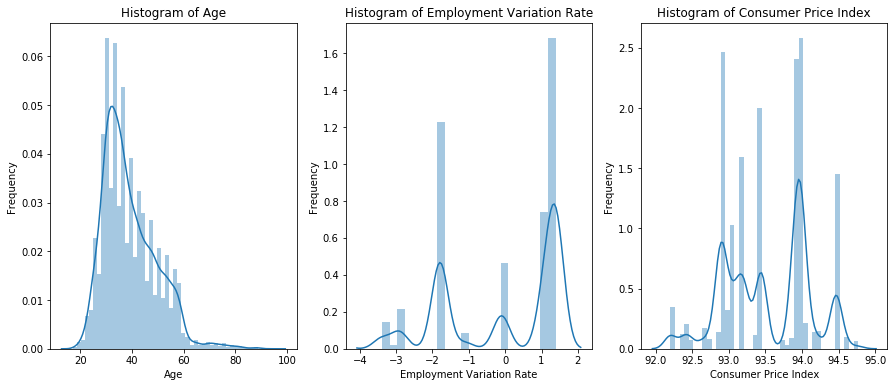

In [423]:
### Distribution of numeric variables
plt.figure(figsize=(15,6))
# age
plt.subplot(1,3,1)
sns.distplot(train_data_eda.age)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# emp.var.rate
plt.subplot(1,3,2)
sns.distplot(train_data_eda['emp.var.rate'])
plt.title('Histogram of Employment Variation Rate')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Frequency')

# cons.price.idx
plt.subplot(1,3,3)
sns.distplot(train_data_eda['cons.price.idx'])
plt.title('Histogram of Consumer Price Index')
plt.xlabel('Consumer Price Index')
plt.ylabel('Frequency')
plt.show()

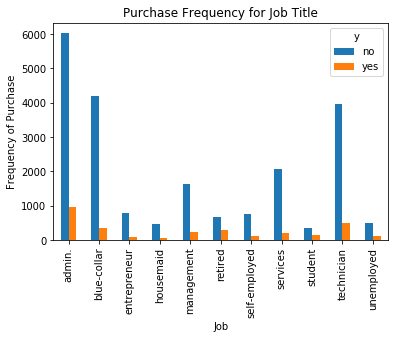

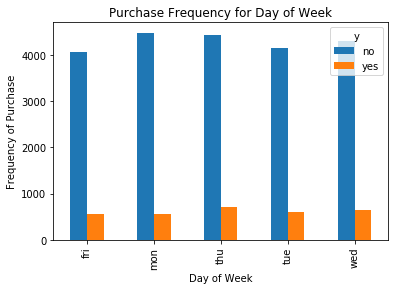

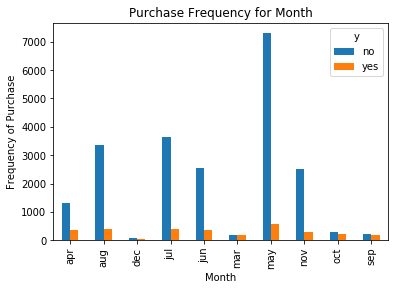

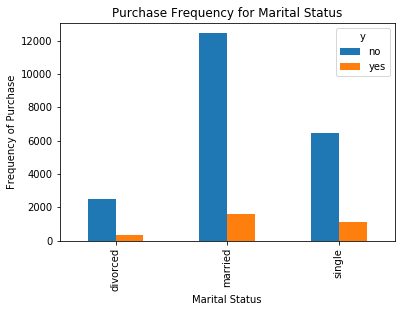

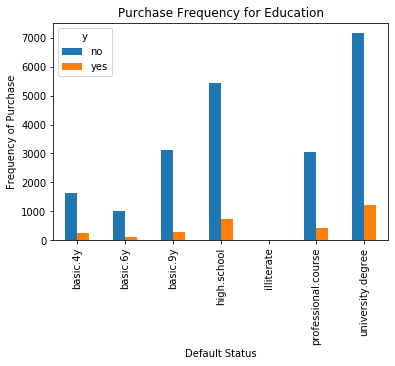

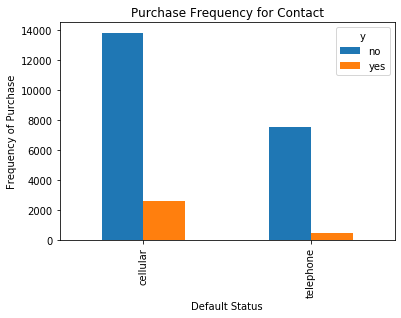

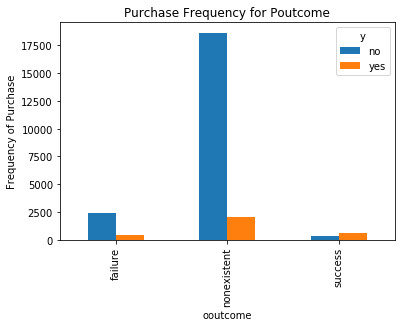

In [434]:
### Distribution of categorical variables
#plt.figure(figsize=(15,6))

# job
#plt.subplot(2,4,1)
pd.crosstab(train_data_eda.job,train_data_eda.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()
# day of week
#plt.subplot(2,4,2)
pd.crosstab(train_data_eda.day_of_week,train_data_eda.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()
# month
#plt.subplot(2,4,3)
pd.crosstab(train_data_eda.month,train_data_eda.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()
# marital
#plt.subplot(2,4,4)
pd.crosstab(train_data_eda.marital, train_data_eda.y).plot(kind='bar')
plt.title('Purchase Frequency for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Purchase')
plt.show()
# education
#plt.subplot(2,4,5)
pd.crosstab(train_data_eda.education, train_data_eda.y).plot(kind='bar')
plt.title('Purchase Frequency for Education')
plt.xlabel('Default Status')
plt.ylabel('Frequency of Purchase')
plt.show()
# contact
#plt.subplot(2,4,6)
pd.crosstab(train_data_eda.contact, train_data_eda.y).plot(kind='bar')
plt.title('Purchase Frequency for Contact')
plt.xlabel('Default Status')
plt.ylabel('Frequency of Purchase')
plt.show()
# poutcome
#plt.subplot(2,4,7)
pd.crosstab(train_data_eda.poutcome,train_data_eda.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('ooutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

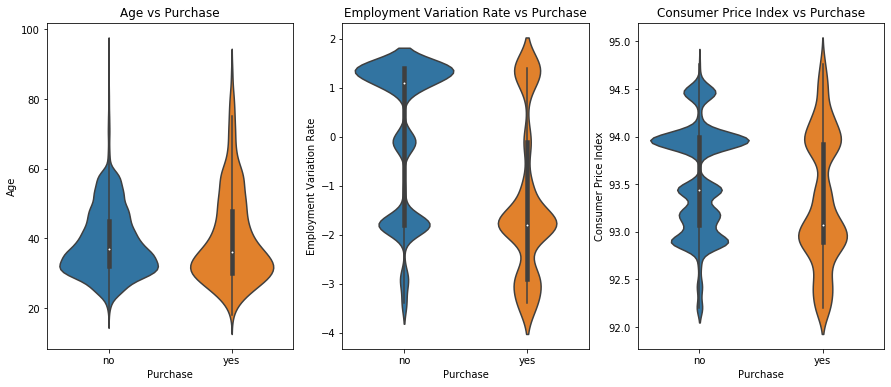

In [426]:
### Distribution of numeric variables wrt response variable
plt.figure(figsize=(15,6))
# age
plt.subplot(1,3,1)
sns.violinplot(x='y', y='age', data=train_data_eda)
plt.title('Age vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('Age')

# emp.var.rate
plt.subplot(1,3,2)
sns.violinplot(x='y', y='emp.var.rate', data=train_data_eda)
plt.title('Employment Variation Rate vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('Employment Variation Rate')

# cons.price.idx
plt.subplot(1,3,3)
sns.violinplot(x='y', y='cons.price.idx', data=train_data_eda)
plt.title('Consumer Price Index vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('Consumer Price Index')
plt.show()

### Model building

**Training/test split**

The design is to divide the whole available datasets on training and test set on a 80 to 20 scale. Then different models will be performed on the training set with k-fold cross validation. By comparing the set of performance scores obtained, we can have an intuition on which type of supervised model is fitting the data best. Then after deciding on which model to implement, the performance score from test set will be calculated to indicate the generalization of the model with regard to new data.

**SMOTE oversampling**

The major interest of the project is to provide predictions and inferencial relationship with regard to clients who will actually subscribe a term deposit. Those clients who will probaly not subscribe cannot provide interest to the banking institution and therefore put as relatively lower importance. However, the response in the dataset is very imbalanced with fewer records of those who subscribed and more records of those who did not. This can lead to poor performance of the minority class, which is the more important thing we would want to predict.

Therefore, Synthetic Minority Oversampling Technique (SMOTE) is used by synthetically generate examples that are relatively close in feature space to existing examples of the minority class.


**Supervised learning**

The supervised learning techniques used include logistic regssion, LASSO, and KNN. As we would like to induce some inferencial relationships between marketing compaigns and subscription of term deposit, a normal logistic regression can give us the coefficients of each predictor. This gives us a sense of relative importance in terms of the change of one particular predictor can result in how much change in odds of subscription. 

On top of logistic regression, LASSO is also tried as there are many predictors after converting multi-categorical variables into dummy variables. LASSO will help feature selection by placing a larger penalty and reducing the corresponding coeffecients to zero. Lastly, KNN is performed as the most flexible model with a major aim for higher prediction accuracy with low bias. On the other hand, the drawback is that such model has high variance any may not generalize well.

Here the hyperparameters (such as c in the LASSO model and k in the KNN model), are chosen by looping through appropriate possible range of the hyperparameter using the whole training set. By looking at the performance of the training set, the most appropriate hyperparameter is then applied with k-fold cross validation on the training set. Then such performance scores are used to compared with each other model.



In [339]:
print(f'The positive and negative response in y_train is very unbalanced:\n {collections.Counter(y_train).items()}')


The positive and negative response in y_train is very unbalanced:
 dict_items([('no', 29302), ('yes', 3648)])


In [357]:
train_data_processed = preprocessing(train_data)

In [359]:
# Use SMOTE oversampling to generates synthetic samples from the minority class (y_train)

def resample_train_data(X_train, y_train):  
    smo = SMOTE(random_state=42)
    attrs_name = X_train.columns.values.tolist()
    attrs_name.append('y')
    x_smo, y_smo = smo.fit_sample(X_train, y_train)
    x_smo = pd.DataFrame(x_smo)
    y_smo = pd.DataFrame(y_smo)
    train_data = pd.concat([x_smo, y_smo], axis=1)
    train_data.columns = attrs_name
    return shuffle(train_data)

#train_data_processed
X_train,y_train = train_data_processed.drop('y',axis=1),train_data_processed['y']
train_data_resampled = resample_train_data(X_train,y_train)

In [360]:
print(f'After using SMOTE oversampling, the minority class in response is now balanced:\n {collections.Counter(train_data.y).items()}')


After using SMOTE oversampling, the minority class in response is now balanced:
 dict_items([(0, 21420), (1, 3033)])


In [361]:
X_train,y_train = X_train.to_numpy(),y_train.to_numpy()


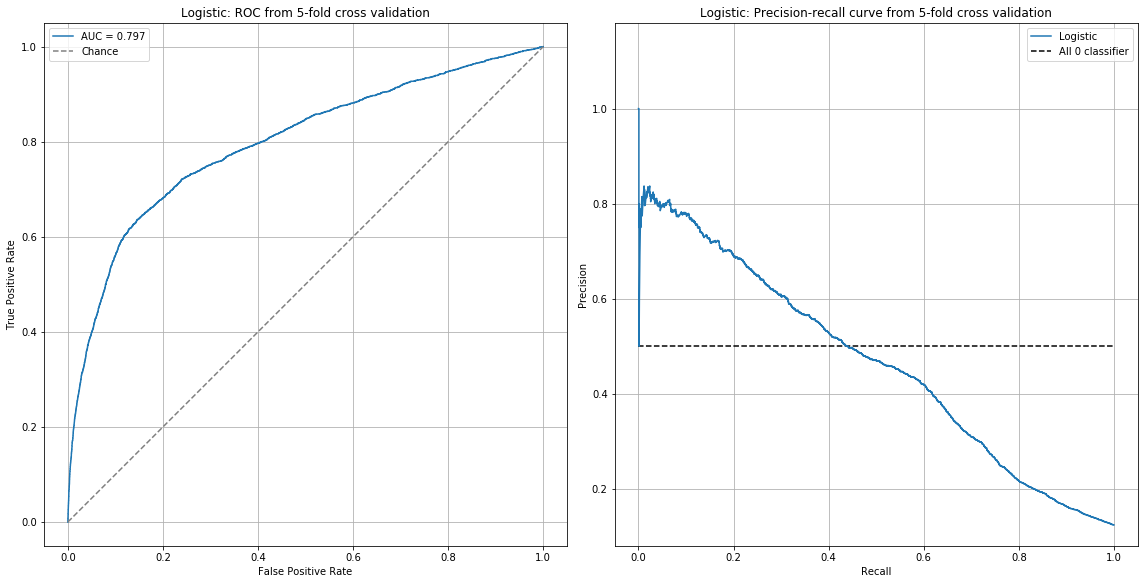

In [362]:
### Logistic regression
# ROC with k fold cross validation on training set
warnings.filterwarnings('ignore')

# Establish k folds
kf = StratifiedKFold(n_splits=5, shuffle=True)
pred_prob = np.empty(y_train.shape, dtype='object')

for train_index, val_index in kf.split(X_train, y_train):
    # Extract the training and validation data for this fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    
    # Train the classifier
    clf = LogisticRegression(solver='lbfgs')
    clf.fit(X_train_cv, y_train_cv)

    # Test the classifier on the validation data for this fold
    cpred = clf.predict_proba(X_val_cv)[:,1]
    
    # Save the predictions for this fold
    pred_prob[val_index] = cpred

# ROC curve
from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(y_train, pred_prob, pos_label=1)
auc = metrics.roc_auc_score(y_train, pred_prob)
legend_string = 'AUC = {:0.3f}'.format(auc)
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=legend_string)
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.title('Logistic: ROC from 5-fold cross validation')
plt.tight_layout()

# Precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_train, pred_prob, pos_label=1)
plt.subplot(1,2,2)
plt.plot(recall, precision,label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim(0,1)
plt.grid('on')
plt.axis('square')
plt.hlines(y=0.5,xmin=0,xmax=1,linestyles='dashed',label='All 0 classifier')
plt.legend()
plt.title('Logistic: Precision-recall curve from 5-fold cross validation')
plt.tight_layout()

In [371]:
test_data_processed = preprocessing(test_data)
X_test,y_test = test_data_processed.drop('y',axis=1),test_data_processed['y']
X_test,y_test = X_test.to_numpy(),y_test.to_numpy()

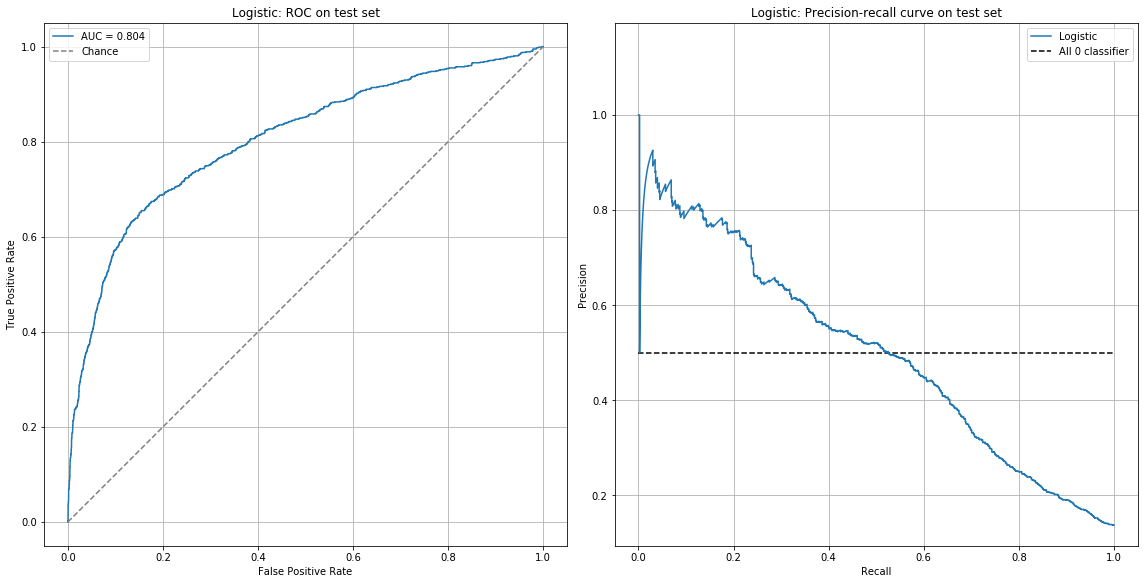

In [372]:
### final model using all train data and plot on test data
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# Test the trained classifier on the test data
y_test_pred = clf.predict_proba(X_test)[:,1]

# ROC curve
fpr, tpr, thres = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_test_pred)
legend_string = 'AUC = {:0.3f}'.format(auc)
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=legend_string)
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.title('Logistic: ROC on test set')
plt.tight_layout()

# Precision-recall curve
precision, recall, thres = precision_recall_curve(y_test, y_test_pred, pos_label=1)
plt.subplot(1,2,2)
plt.plot(recall, precision,label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim(0,1)
plt.grid('on')
plt.axis('square')
plt.hlines(y=0.5,xmin=0,xmax=1,linestyles='dashed',label='All 0 classifier')
plt.legend()
plt.title('Logistic: Precision-recall curve on test set')
plt.tight_layout()

### Conclusions

The final model chosen is the logistic regression from which we are able to obtain around 0.779 AUC value on the test set. Regrading the precision and recall curve, as we focus more on clients who do purchase the term deposit, we might want to set the threshold to be lower to increase precision. 

The cofficients of the classifier gives us a sense of the inferencial relationships and estimated relative importance between different predictors and the response variable. It can be seen that in alignment with EDA, the result of a client purchasing a term deposit or not will vary greatly depend on the time taken for the marketing compaign. Among weekdays and months, Monday and November seem to increase the odds of purchase the most. Different types of jobs or marital status the clients have will influence their purchase decision differently as well. The previous marketing compaign outcome as well as contact methods also play an important role predicting the purchase decision. 

Regarding numeric measures, with each unit increase in consumer price index, the odds of client purchasing a term deposit drop significantly. As such measure examines the weighted average of prices of a basket of consumer goods and services, the higher such prices are, naturally the less likely the clients would have the money to purchase the term deposit the bank institution is offering. Interestingly, with each unit increase in employment variation rate, the odds of purchasing the term deposit is higher. As the variation of getting hired or fired due to the shifts in the conditions of the economy increases, clients might want to purchase more secure financial products to try to minimize the risks.


In [373]:
zipped = zip(X_train_pd.columns.to_list(),clf.coef_.tolist()[0])
sorted(zipped, key = lambda x: x[1])

[('emp.var.rate', -4.395634536418036),
 ('campaign', -1.4784032956272146),
 ('pdays', -0.9213422679163302),
 ('nr.employed', -0.7288040222853475),
 ('month_may', -0.5416830103792806),
 ('month_nov', -0.5390453688165041),
 ('poutcome_failure', -0.47874373157185174),
 ('contact_telephone', -0.3644755227797596),
 ('month_jun', -0.3253677260598536),
 ('day_of_week_mon', -0.23552325591573267),
 ('job_blue-collar', -0.20759133089385148),
 ('job_services', -0.196706893848573),
 ('previous', -0.1902112583523944),
 ('month_sep', -0.16788860218358617),
 ('age', -0.09325399840453134),
 ('job_entrepreneur', -0.0858425437504673),
 ('day_of_week_fri', -0.08511006883813822),
 ('default', -0.066867332027931),
 ('marital_divorced', -0.06400321226387432),
 ('job_self-employed', -0.06093516963952937),
 ('job_management', -0.060642581377619555),
 ('month_oct', -0.05801931333329165),
 ('job_technician', -0.03846851348331569),
 ('housing', -0.025972588015402174),
 ('marital_single', -0.02013374466610539),
 

In [81]:
def cost(w, X, y):
    '''
    The function takes given dataset with corresponding class labels as input,
    and outputs cost C(w)
    '''
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return np.sum(np.log(1+np.exp(np.dot(X,w))) - y*np.dot(X,w))/X.shape[0]

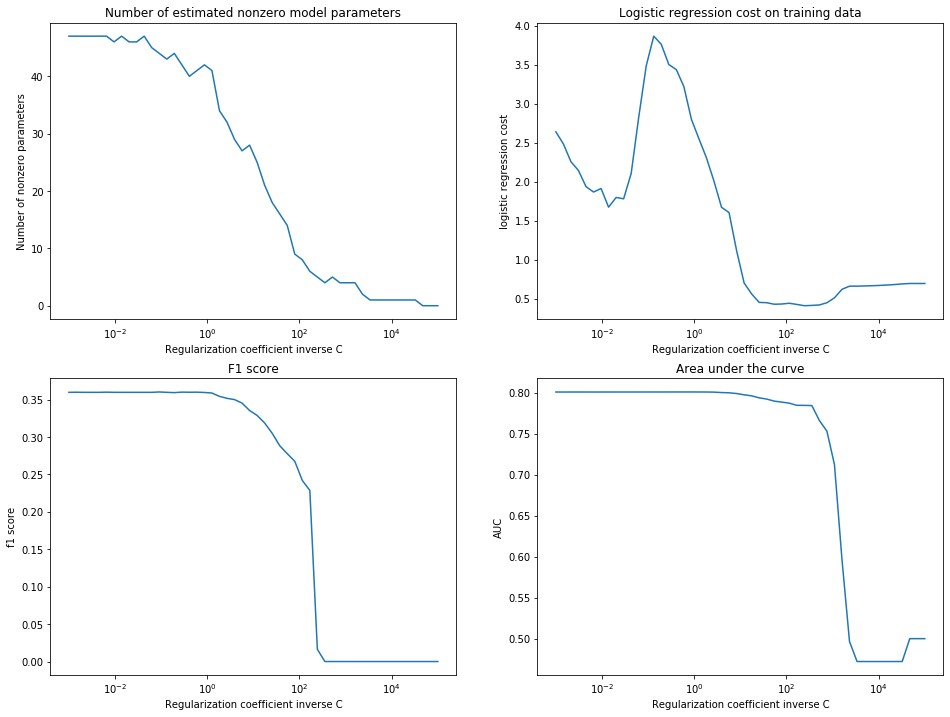

In [363]:
### Logistic regression LASSO on training

import warnings
warnings.filterwarnings('ignore')

non0_list = []
cost_list = []
f1_list = []
auc_list = []

c_list = np.logspace(-5,3,50)

for c in c_list:
    clf_lasso = LogisticRegression(penalty='l1', C=c, solver='liblinear').fit(X_train, y_train)
    y_train_pred = clf_lasso.predict(X_train)
    y_train_prob = clf_lasso.predict_proba(X_train)[:,1]

    non0 = np.count_nonzero(clf_lasso.coef_)
    non0_list.append(non0)
    
    w = np.append(clf_lasso.coef_, clf_lasso.intercept_)
    cost_train = cost(w, X_train, y_train)
    cost_list.append(cost_train)
    
    f1 = metrics.f1_score(y_train, y_train_pred, pos_label=1)
    f1_list.append(f1)
    
    auc = metrics.roc_auc_score(y_train, y_train_prob)
    auc_list.append(auc)

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.plot(c_list**(-1), non0_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient inverse C')
plt.ylabel('Number of nonzero parameters')
plt.title('Number of estimated nonzero model parameters')

plt.subplot(2,2,2)
plt.plot(c_list**(-1), cost_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient inverse C')
plt.ylabel('logistic regression cost')
plt.title('Logistic regression cost on training data')

plt.subplot(2,2,3)
plt.plot(c_list**(-1), f1_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient inverse C')
plt.ylabel('f1 score')
plt.title('F1 score')

plt.subplot(2,2,4)
plt.plot(c_list**(-1), auc_list)
plt.xscale('log')
plt.xlabel('Regularization coefficient inverse C')
plt.ylabel('AUC')
plt.title('Area under the curve')
plt.show()

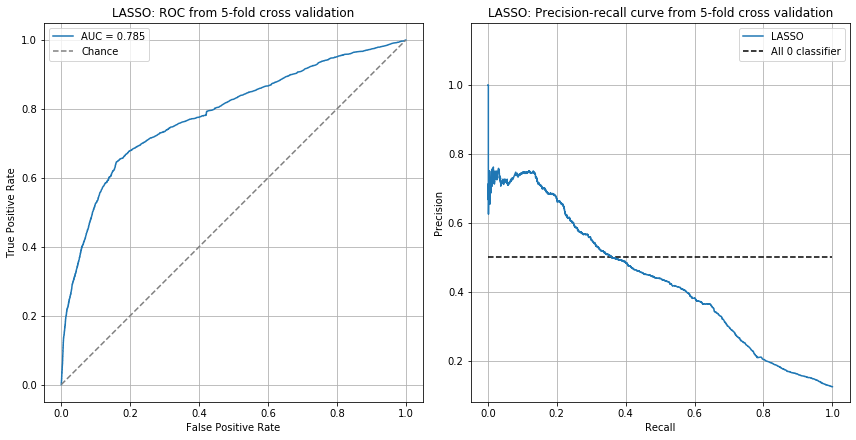

In [364]:
# Use LASSO with c=0.01
# ROC with 5-fold cross validation on training set

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Establish k folds
kf = StratifiedKFold(n_splits=5, shuffle=True)
pred_prob = np.empty(y_train.shape, dtype='object')

for train_index, val_index in kf.split(X_train, y_train):
    # Extract the training and validation data for this fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    
    # Train the classifier
    clf_lasso = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')
    clf_lasso.fit(X_train_cv, y_train_cv)

    # Test the classifier on the validation data for this fold
    cpred = clf_lasso.predict_proba(X_val_cv)[:,1]
    
    # Save the predictions for this fold
    pred_prob[val_index] = cpred

# ROC with k-fold cross validation
from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(y_train, pred_prob, pos_label=1)
auc = metrics.roc_auc_score(y_train, pred_prob)
legend_string = 'AUC = {:0.3f}'.format(auc)

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=legend_string)
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.title('LASSO: ROC from 5-fold cross validation')
plt.tight_layout()

# Precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_train, pred_prob, pos_label=1)
plt.subplot(1,2,2)
plt.plot(recall, precision,label='LASSO')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid('on')
plt.axis('square')
#plt.ylim(0,1.2)
plt.hlines(y=0.5,xmin=0,xmax=1,linestyles='dashed',label='All 0 classifier')
plt.legend()
plt.title('LASSO: Precision-recall curve from 5-fold cross validation')
plt.tight_layout()

best k：12，with score of 0.8856


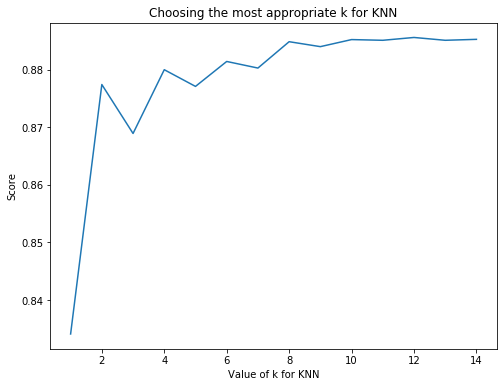

In [365]:
### KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt

best_k = -1
best_score = 0
k_range = range(1, 15)
k_score = []
for i in k_range:
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf_knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    k_score.append(scores)
    if scores > best_score:
        best_score = scores
        best_k = i
        
print(f'best k：{best_k}，with score of {round(best_score, 4)}')

plt.figure(figsize=(8,6))
plt.plot(k_range, k_score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Score')
plt.title('Choosing the most appropriate k for KNN')
plt.show()

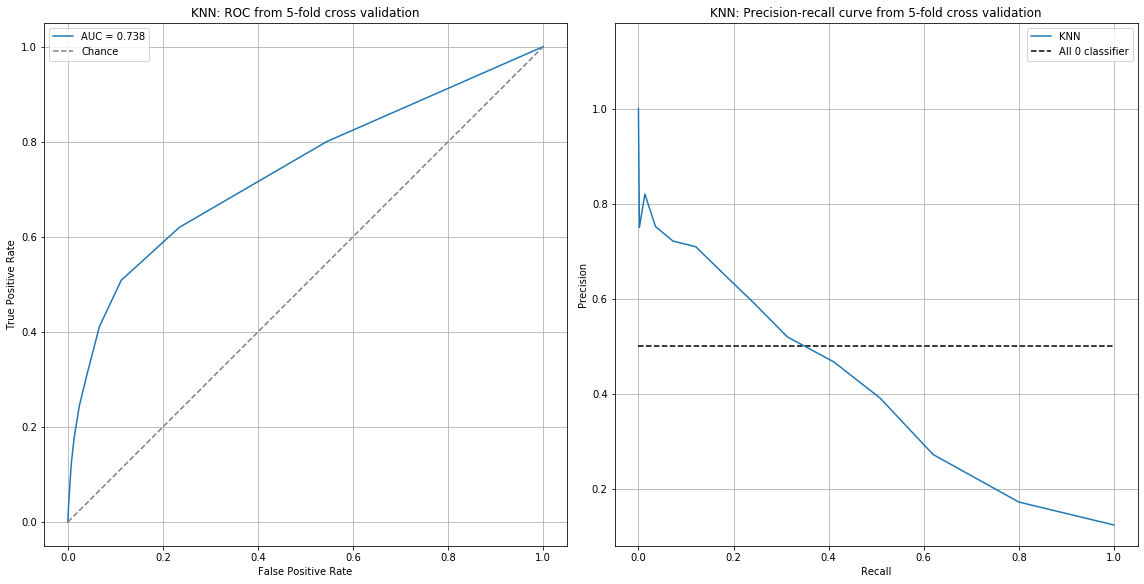

In [366]:
# Use KNN with k=12
# ROC with 5-fold cross validation on training set

warnings.filterwarnings('ignore')

# Establish k folds
kf = StratifiedKFold(n_splits=5, shuffle=True)
pred_prob = np.empty(y_train.shape, dtype='object')

for train_index, val_index in kf.split(X_train, y_train):
    # Extract the training and validation data for this fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    
    # Train the classifier
    clf_knn = KNeighborsClassifier(n_neighbors=12)
    clf_knn.fit(X_train_cv, y_train_cv)

    # Test the classifier on the validation data for this fold
    cpred = clf_knn.predict_proba(X_val_cv)[:,1]
    
    # Save the predictions for this fold
    pred_prob[val_index] = cpred

# ROC with k-fold cross validation
from sklearn import metrics
fpr, tpr, thres = metrics.roc_curve(y_train, pred_prob, pos_label=1)
auc = metrics.roc_auc_score(y_train, pred_prob)
legend_string = 'AUC = {:0.3f}'.format(auc)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=legend_string)
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.title('KNN: ROC from 5-fold cross validation')
plt.tight_layout()

# Precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_train, pred_prob, pos_label=1)
plt.subplot(1,2,2)
plt.plot(recall, precision,label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid('on')
plt.axis('square')
#plt.ylim(0,1.2)
plt.hlines(y=0.5,xmin=0,xmax=1,linestyles='dashed',label='All 0 classifier')
plt.legend()
plt.title('KNN: Precision-recall curve from 5-fold cross validation')
plt.tight_layout()

### Model Evaluation

The models are evaluated through several different measures, including AUC from ROC curve, precision-recall curve, cost function, and F1-score. As a result, the logistic regression classifier has the largest AUC value up to 0.94. The model is able to classify between classes 94% of the time from 5-fold cross validation on the training set. Then after selecting such model, the entire training set is applied. It is found out that using the trained classifier, we are able to obtain AUC value of 0.79 for the test set. 

The certain downgrading in performance might be resulted from very imbalanced datasets both in terms of predictors and the response. It could also be the case of overfitting without sufficient dimensionality reduction. However, the logistic regression model is able to provide us with certain intepretability to induce inferential relationship between relatively more important predictors and response. Such intepretability cannot be achieved by the other models which may have higher predictive power.


### Future Work

There are some drawbacks regarding data preprocessing. By deleting all the missing records, we may have lost much important information and may have skewed the data distribution. Alternatively with regard to missing values, we can use supervised learning models such as random forest using available known values to predict those unknowns. By performing SMOTE oversampling, the synthetic minority class records are created without considering the majority class. This could lead to overfitting since such method replicates the minority class events. Therefore cross validation is utilized after determining the model selected from training data to see the generalization ability of the model. 

As scikit-learn does not support statistical inference, another drawback is the limited interpretability. We are not able to obtain cofficient significance tests, however, it is possible to induce predictors' relative importance by comparing the absolute value of the corresponding coefficients.

Other supervised learning classifiers can be tried as well, including support vector machines, linear discriminant analysis, or quadratic discriminant analysis. As the dimension of the feature space is high, dimensionality reduction techniques can be used before fitting a model such as principal component analysis, and random forest.

### References

1. Building A Logistic Regression in Python, Step by Step. (2020). Retrieved 13 February 2020, from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

2.  Brownlee, J. (2020). SMOTE Oversampling for Imbalanced Classification with Python. Retrieved 13 February 2020, from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/